# 一、导入数据

In [83]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LassoCV
from scipy.stats import ttest_ind, levene
from sklearn.svm import SVC

data_LA = pd.read_csv("input/LA_total.csv",index_col=0)
data_XA = pd.read_csv("input/XA_total.csv",index_col=0)


data_LA_ = pd.DataFrame()
columns_LA = data_LA.columns
for col in columns_LA:
    try:
        df = data_LA[col].astype(np.float64)
        data_LA_ = pd.concat([data_LA_,df],axis=1)
    except:
        pass
    continue
    
data_XA_ = pd.DataFrame()
columns_XA = data_XA.columns
for col in columns_XA:
    try:
        df = data_XA[col].astype(np.float64)
        data_XA_ = pd.concat([data_XA_,df],axis=1)
    except:
        pass
    continue


# 方差齐性
index_ = []
for col in data_LA_.columns:
    if levene(data_LA_[col],data_XA_[col])[1] > 0.05:
        if ttest_ind(data_LA_[col],data_XA_[col])[1] < 0.05:
            index_.append(col)
    else:
        if ttest_ind(data_LA_[col],data_XA_[col],equal_var=False)[1] < 0.05:
            index_.append(col)


data_L_T = data_LA_[index_]
data_X_T = data_XA_[index_]


data = pd.concat([data_L_T,data_X_T])
data = shuffle(data)

target = data.iloc[:, 0]
features = data.iloc[:,1:]
features_bk = features.copy()

transfer = StandardScaler()
features_SS = transfer.fit_transform(features_bk)
# 数据标准化很有必要

alphas_ = np.logspace(-2,0,300)


lassocv = LassoCV(alphas = alphas_,cv = 10,max_iter = 100000).fit(features_SS,target)
lassocv.alpha_
features = data[features.columns[lassocv.coef_!=0]]
print(len(features.columns))
# print(lassocv.coef_[lassocv.coef_!=0])

transfer = StandardScaler()
features_SS = transfer.fit_transform(features)

/root/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:2710: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
/tmp/ipykernel_205876/1083101892.py:41: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if ttest_ind(data_LA_[col],data_XA_[col],equal_var=False)[1] < 0.05:


20


# 三、拆分数据集

In [84]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(
    features_SS, target, 
    test_size = 0.2)

In [85]:
#參數優化

In [86]:
from sklearn.model_selection import GridSearchCV
Cs = np.logspace(-1,1,50)
gammas = np.logspace(-2,0,50)
param_grid = dict(C = Cs,gamma = gammas)
grid = GridSearchCV(SVC(kernel = 'rbf'),param_grid = param_grid,cv = 10).fit(train_features,train_target)
print(grid.best_params_)
C = grid.best_params_['C']
gamma = grid.best_params_['gamma']

{'C': 1.2648552168552958, 'gamma': 0.025595479226995357}


In [87]:
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0,C=C,gamma = gamma)

In [88]:
svc_rbf.fit(train_features, train_target)

SVC(C=1.2648552168552958, coef0=0, gamma=0.025595479226995357)

In [89]:
svc_rbf.score(test_features,test_target)

0.7142857142857143

# 四、建立模型

In [3]:
from sklearn.svm import SVC

In [4]:
svc_linear = SVC(kernel = "linear",max_iter=-1)

In [5]:
svc_linear.fit(train_features, train_target)

SVC(kernel='linear')

In [6]:
svc_linear.coef_

array([[ 0.12287473,  0.35000771, -0.88448728,  0.3155983 , -0.05127434,
         0.09403174, -0.45782242,  0.71430987,  0.10591008,  0.47717084,
         0.80362072, -0.08547818,  0.41633699,  0.85196848, -0.07718769,
        -0.39925421]])

In [7]:
svc_linear.intercept_

array([0.71848965])

In [8]:
test_predict = svc_linear.predict(test_features)
test_predict

array([0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.])

In [9]:
svc_linear.score(test_features,test_target)

0.7142857142857143

In [10]:
svc_poly = SVC(kernel="poly",degree=3,coef0=0)

In [11]:
svc_poly.fit(train_features, train_target)

SVC(coef0=0, kernel='poly')

In [12]:
#svc_poly.coef_

In [13]:
svc_poly.intercept_

array([0.67882373])

In [14]:
test_predict = svc_poly.predict(test_features)
test_predict

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [15]:
svc_poly.score(test_features,test_target)

0.5357142857142857

In [69]:
svc_rbf = SVC(kernel="rbf",degree=3,coef0=1)

In [70]:
svc_rbf.fit(train_features, train_target)

SVC(coef0=1)

In [71]:
#svc_rbf.coef_

In [72]:
svc_rbf.intercept_

array([0.67210614])

In [73]:
test_predict = svc_rbf.predict(test_features)
test_predict

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.])

In [74]:
svc_rbf.score(test_features,test_target)

0.7857142857142857

# 五、查看模型效能

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score

In [23]:
accuracy_score(test_target,test_predict)

0.8214285714285714

In [24]:
confusion_matrix(test_target,test_predict)

array([[ 9,  4],
       [ 1, 14]])

In [25]:
import seaborn as sns

<Axes: >

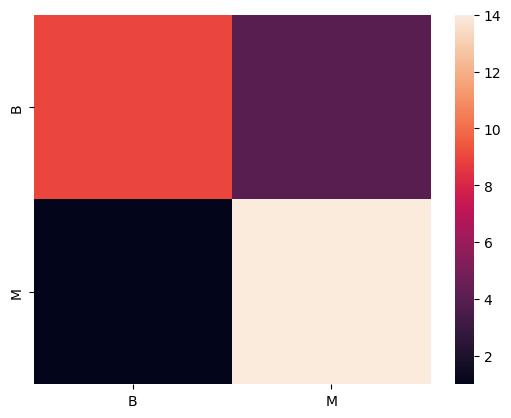

In [26]:
sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])

In [27]:
y_score = svc_rbf.decision_function(test_features)

In [28]:
fpr, tpr, thresholds = roc_curve(test_target, y_score)

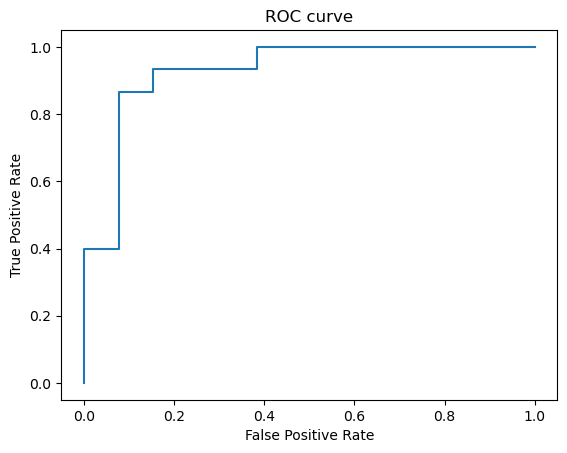

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [30]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

/root/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


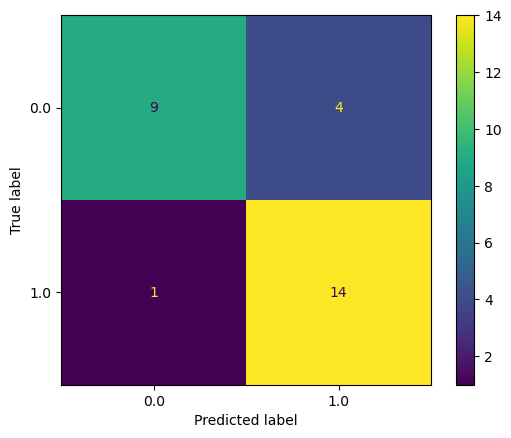

In [31]:
plot_confusion_matrix(svc_rbf, test_features, test_target)

/root/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


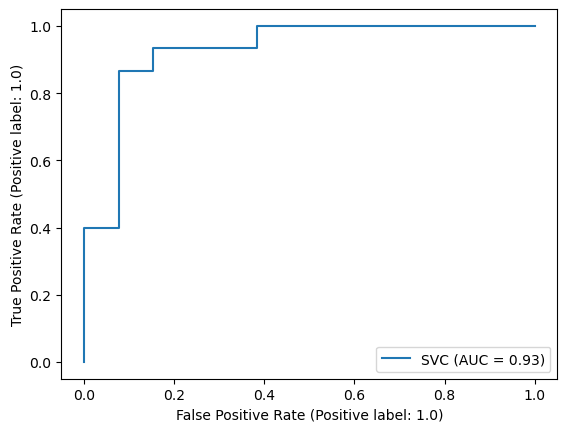

In [32]:
plot_roc_curve(svc_rbf, test_features, test_target)

/root/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


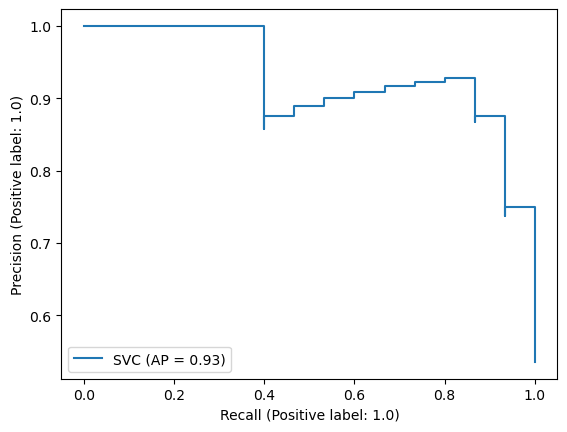

In [33]:
plot_precision_recall_curve(svc_rbf, test_features, test_target)

# 六、知识拓展

In [34]:
Cs = np.logspace(-3,2,200)

In [35]:
acc_=[]
for C_ in Cs:
    svc_rbf = SVC(kernel="rbf",C=C_)
    svc_rbf.fit(train_features, train_target)
    acc_.append(svc_rbf.score(test_features, test_target))

In [36]:
acc_

[0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857142857,
 0.5357142857

In [37]:
len(acc_)

200

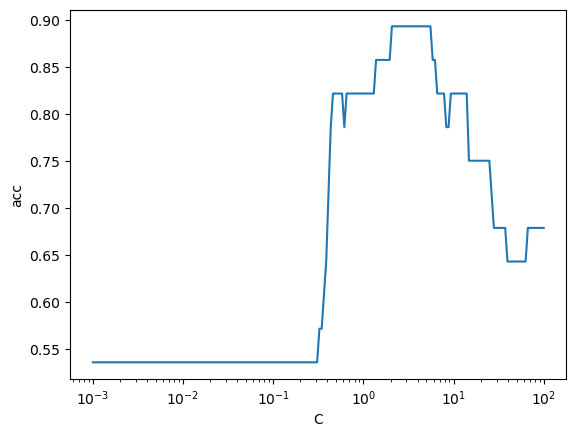

In [38]:
plt.plot(Cs, acc_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('acc')
plt.show()

In [39]:
from sklearn.metrics import auc

In [40]:
Cs = np.logspace(-3,2,200)
aucs_=[]
for C_ in Cs:
    svc_rbf = SVC(kernel="rbf",C=C_)
    svc_rbf.fit(train_features, train_target)
    y_score = svc_rbf.decision_function(test_features)
    fpr, tpr, thresholds = roc_curve(test_target, y_score)
    auc_ = auc(fpr, tpr)
    aucs_.append(auc_)

In [41]:
aucs_

[0.8769230769230769,
 0.8717948717948718,
 0.8820512820512821,
 0.8820512820512821,
 0.8871794871794872,
 0.8871794871794872,
 0.8871794871794872,
 0.8871794871794872,
 0.8871794871794871,
 0.8769230769230769,
 0.8769230769230769,
 0.8923076923076924,
 0.8923076923076924,
 0.8923076923076924,
 0.8923076923076924,
 0.8923076923076924,
 0.8923076923076924,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8820512820512821,
 0.8820512820512821,
 0.8820512820512821,
 0.8820512820512821,
 0.8820512820512821,
 0.8820512820512821,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8820512820512821,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8820512820512821,
 0.8820512820512821,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871794871,
 0.8871794871

In [42]:
len(aucs_)

200

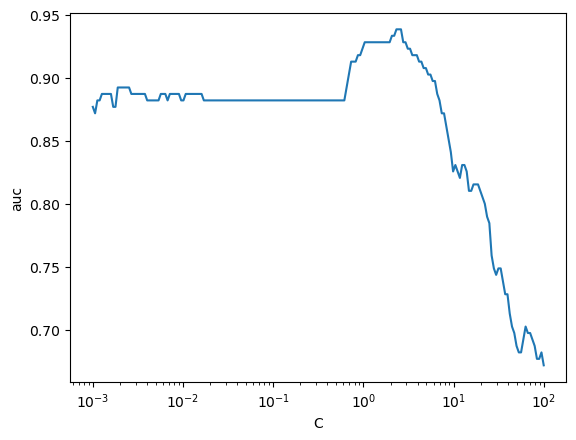

In [43]:
plt.plot(Cs, aucs_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('auc')
plt.show()